# Lend or Lose 
## Project-2
## Team: 
### PAU:<br/>
1) Ayush Arya Kashyap (IMT2022129) <br/>
2) Uttam Hamsaraj (IMT2020524) <br/>
3) Keshav Goyal (IMT2022560) 
## Problem Statement: 
Predict whether the company will give Loan to the person or not. 
## Given: 
Hand-labeled dataset consisting of columns with unique LoanIDs and whether they are eligible for Loan or no. 
## Dateset:
[https://www.kaggle.com/competitions/lend-or-lose/data](https://www.kaggle.com/competitions/lend-or-lose/data)

## Handling Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from ydata_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Preprocessing
## Handling unnecessary values:
Checking for null values and duplicate values.
We ended up observing there are no null or duplicate

In [10]:
df = pd.read_csv("train.csv")

In [11]:
df

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0       DRIRC89L0T   18  137576      209136          846              26   
1       TS0FIUNHNU   47   57194        5970          748              30   
2       I0YR284A1V   26   84328       95065          453               7   
3       WB1T7NQV8A   53   49795      229582          533             107   
4       J6GU9M4G1Z   49  115450       22072          840               0   
...            ...  ...     ...         ...          ...             ...   
204272  KYS1HKNGGE   40  116623      161673          651              79   
204273  5MAOH3AOZO   67   62958      189499          460              77   
204274  5Y9Z6NW29X   62   34372       59645          524              94   
204275  O51974F566   44  146262      198454          489               7   
204276  SVGAIO53ZK   36   97844      188593          542               2   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0                    2         10.47        60      0.81  High School   
1                    2         19.72        36      0.73  High School   
2                    2         24.25        12      0.45     Master's   
3                    3         14.44        60      0.17   Bachelor's   
4                    4         24.48        12      0.11   Bachelor's   
...                ...           ...       ...       ...          ...   
204272               2         23.44        12      0.87   Bachelor's   
204273               3          9.29        36      0.11   Bachelor's   
204274               3          9.72        60      0.24          PhD   
204275               4          4.31        48      0.30  High School   
204276               3         23.14        24      0.83   Bachelor's   

       EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0       Self-employed        Single         Yes            No    Business   
1          Unemployed      Divorced          No           Yes   Education   
2       Self-employed       Married          No            No       Other   
3       Self-employed        Single         Yes            No        Auto   
4           Part-time        Single          No           Yes   Education   
...               ...           ...         ...           ...         ...   
204272      Part-time      Divorced          No            No        Home   
204273  Self-employed        Single          No            No    Business   
204274      Full-time        Single         Yes            No        Auto   
204275  Self-employed       Married         Yes            No        Home   
204276      Part-time      Divorced          No            No        Home   

       HasCoSigner  Default  
0               No        0  
1               No        0  
2              Yes        0  
3              Yes        1  
4              Yes        0  
...            ...      ...  
204272         Yes        0  
204273         Yes        0  
204274          No        0  
204275          No        0  
204276          No        1  

[204277 rows x 18 columns]

In [12]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.drop(columns="LoanID", inplace=True)

## Looking at the correlation

In [17]:

from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
df

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0        18  137576      209136          846              26               2   
1        47   57194        5970          748              30               2   
2        26   84328       95065          453               7               2   
3        53   49795      229582          533             107               3   
4        49  115450       22072          840               0               4   
...     ...     ...         ...          ...             ...             ...   
204272   40  116623      161673          651              79               2   
204273   67   62958      189499          460              77               3   
204274   62   34372       59645          524              94               3   
204275   44  146262      198454          489               7               4   
204276   36   97844      188593          542               2               3   

        InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  \
0              10.47        60      0.81          1               2   
1              19.72        36      0.73          1               3   
2              24.25        12      0.45          2               2   
3              14.44        60      0.17          0               2   
4              24.48        12      0.11          0               1   
...              ...       ...       ...        ...             ...   
204272         23.44        12      0.87          0               1   
204273          9.29        36      0.11          0               2   
204274          9.72        60      0.24          3               0   
204275          4.31        48      0.30          1               2   
204276         23.14        24      0.83          0               1   

        MaritalStatus  HasMortgage  HasDependents  LoanPurpose  HasCoSigner  \
0                   2            1              0            1            0   
1                   0            0              1            2            0   
2                   1            0              0            4            1   
3                   2            1              0            0            1   
4                   2            0              1            2            1   
...               ...          ...            ...          ...          ...   
204272              0            0              0            3            1   
204273              2            0              0            1            1   
204274              2            1              0            0            0   
204275              1            1              0            3            0   
204276              0            0              0            3            0   

        Default  
0             0  
1             0  
2             0  
3             1  
4             0  
...         ...  
204272        0  
204273        0  
204274        0  
204275        0  
204276        1  

[204277 rows x 17 columns]

In [18]:
correlation=df.corr()
correlation['Default'].sort_values(ascending=False)

Default           1.000000
InterestRate      0.129885
LoanAmount        0.085519
EmploymentType    0.042670
NumCreditLines    0.028565
DTIRatio          0.018595
LoanTerm          0.000815
MaritalStatus    -0.008441
LoanPurpose      -0.010799
HasMortgage      -0.021174
Education        -0.021508
CreditScore      -0.034128
HasDependents    -0.034737
HasCoSigner      -0.040688
MonthsEmployed   -0.095429
Income           -0.100515
Age              -0.167484
Name: Default, dtype: float64

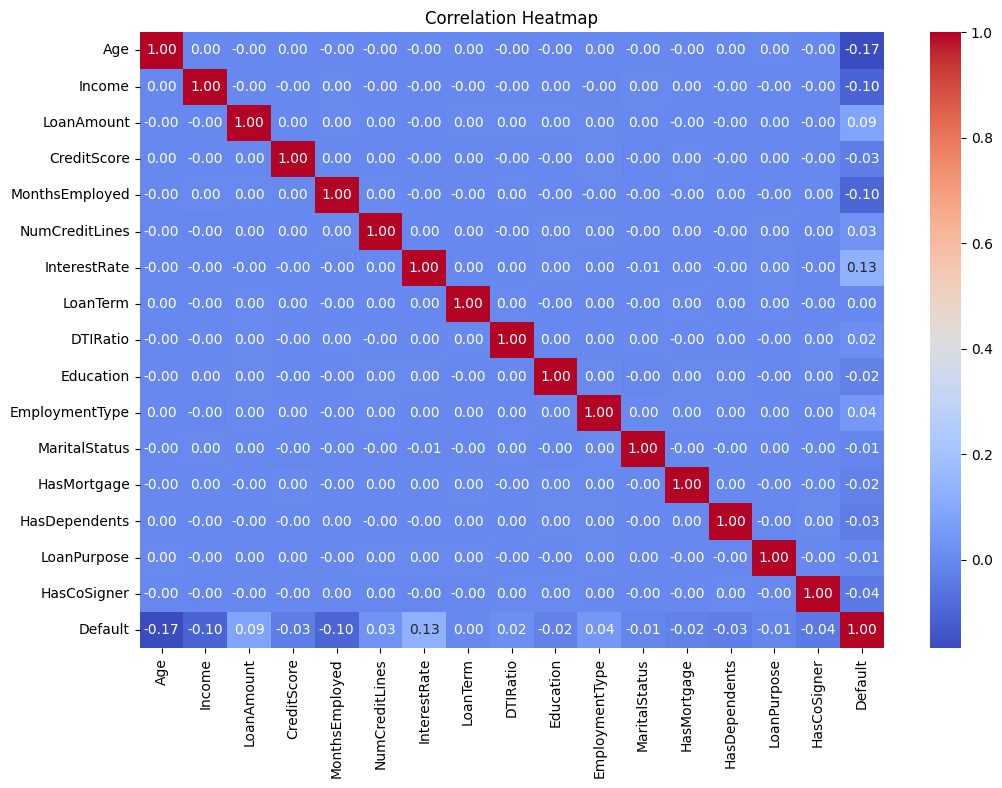

In [19]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### We end up observing that even though all the columns have less correlation with our target column, the loan term is the one which is least correlated. <br>
### Thus we end up dropping it

In [20]:
df.drop(columns="LoanTerm", inplace=True)

# Visualising the Data
We are visualising the data to get a better idea of how the data is distributed

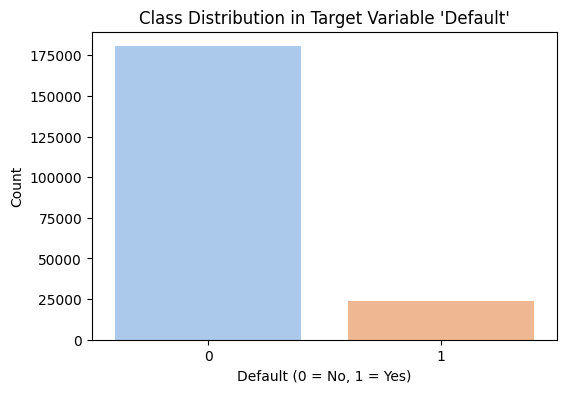

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Default', hue='Default', data=df, palette='pastel', legend=False) 
plt.title("Class Distribution in Target Variable 'Default'")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

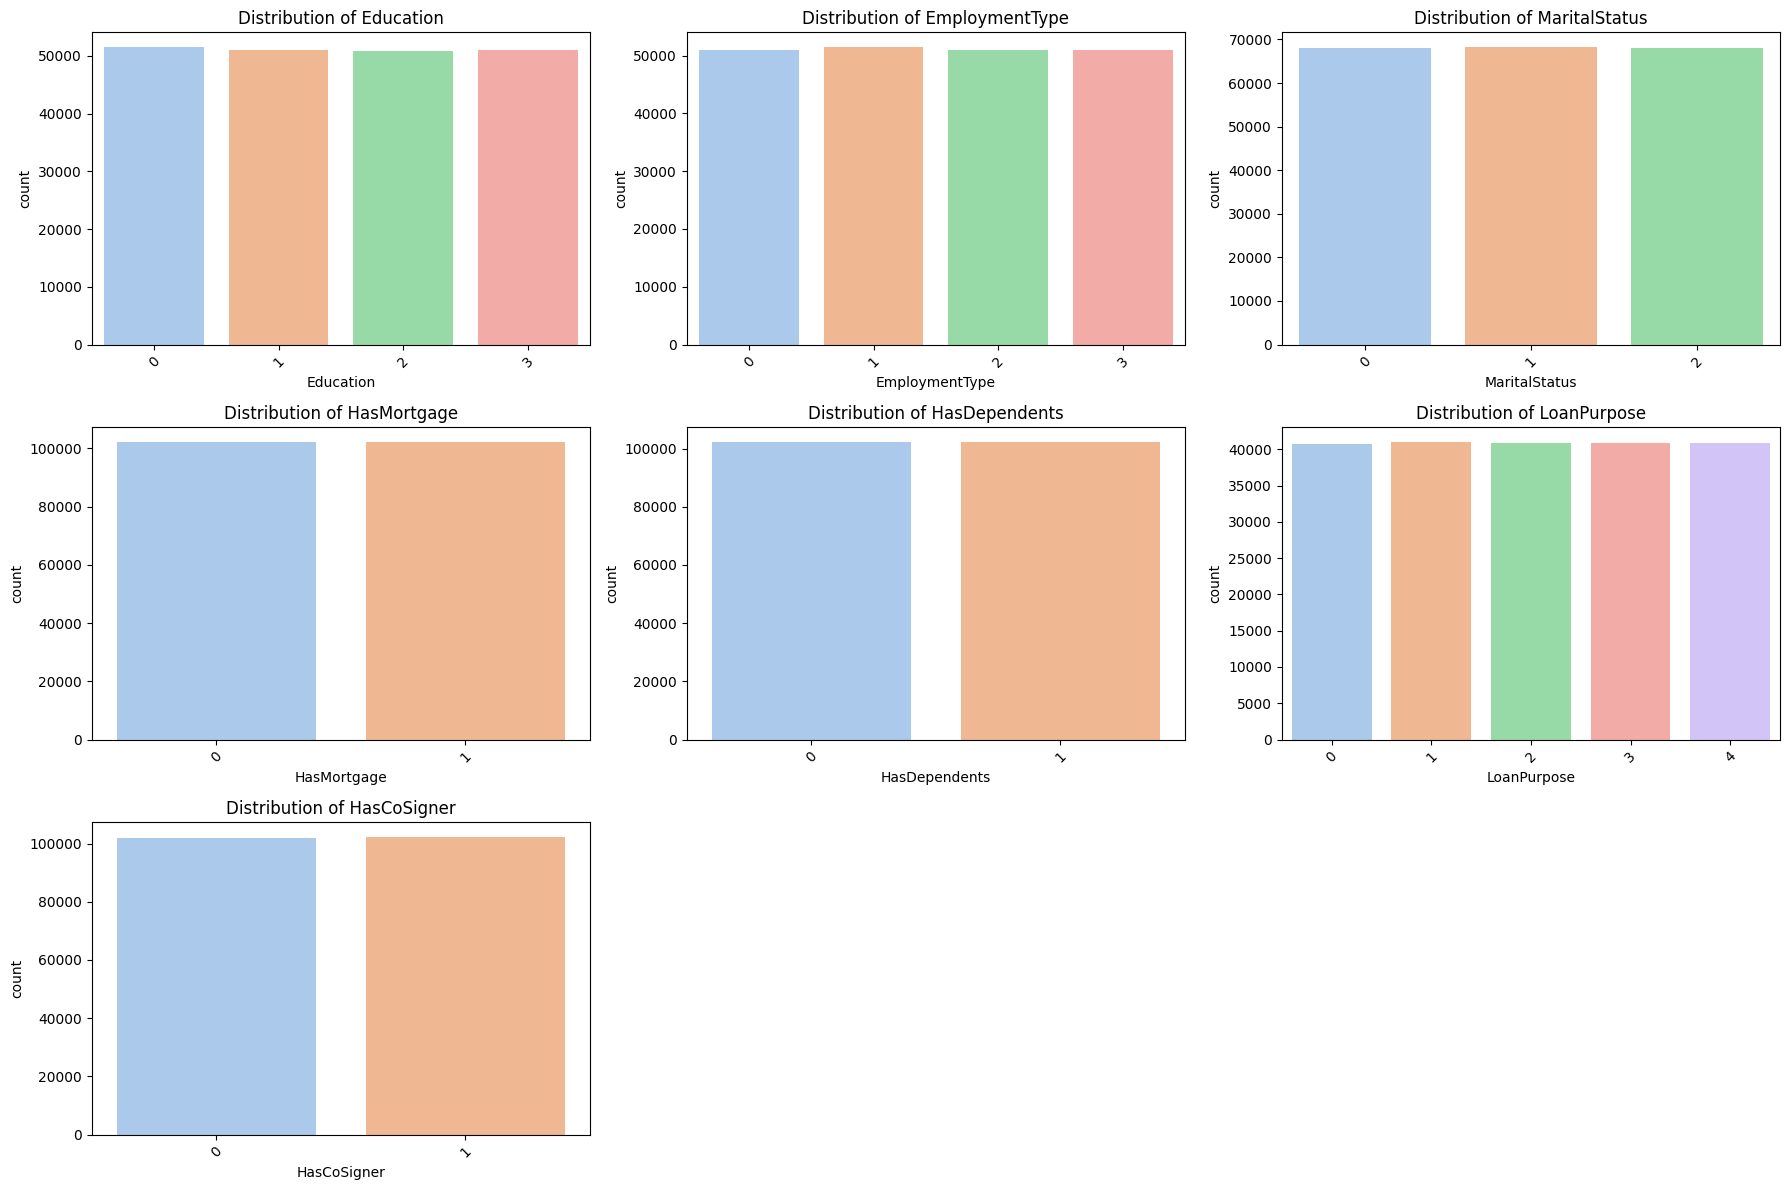

In [24]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue=col, palette='pastel', legend=False) 
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

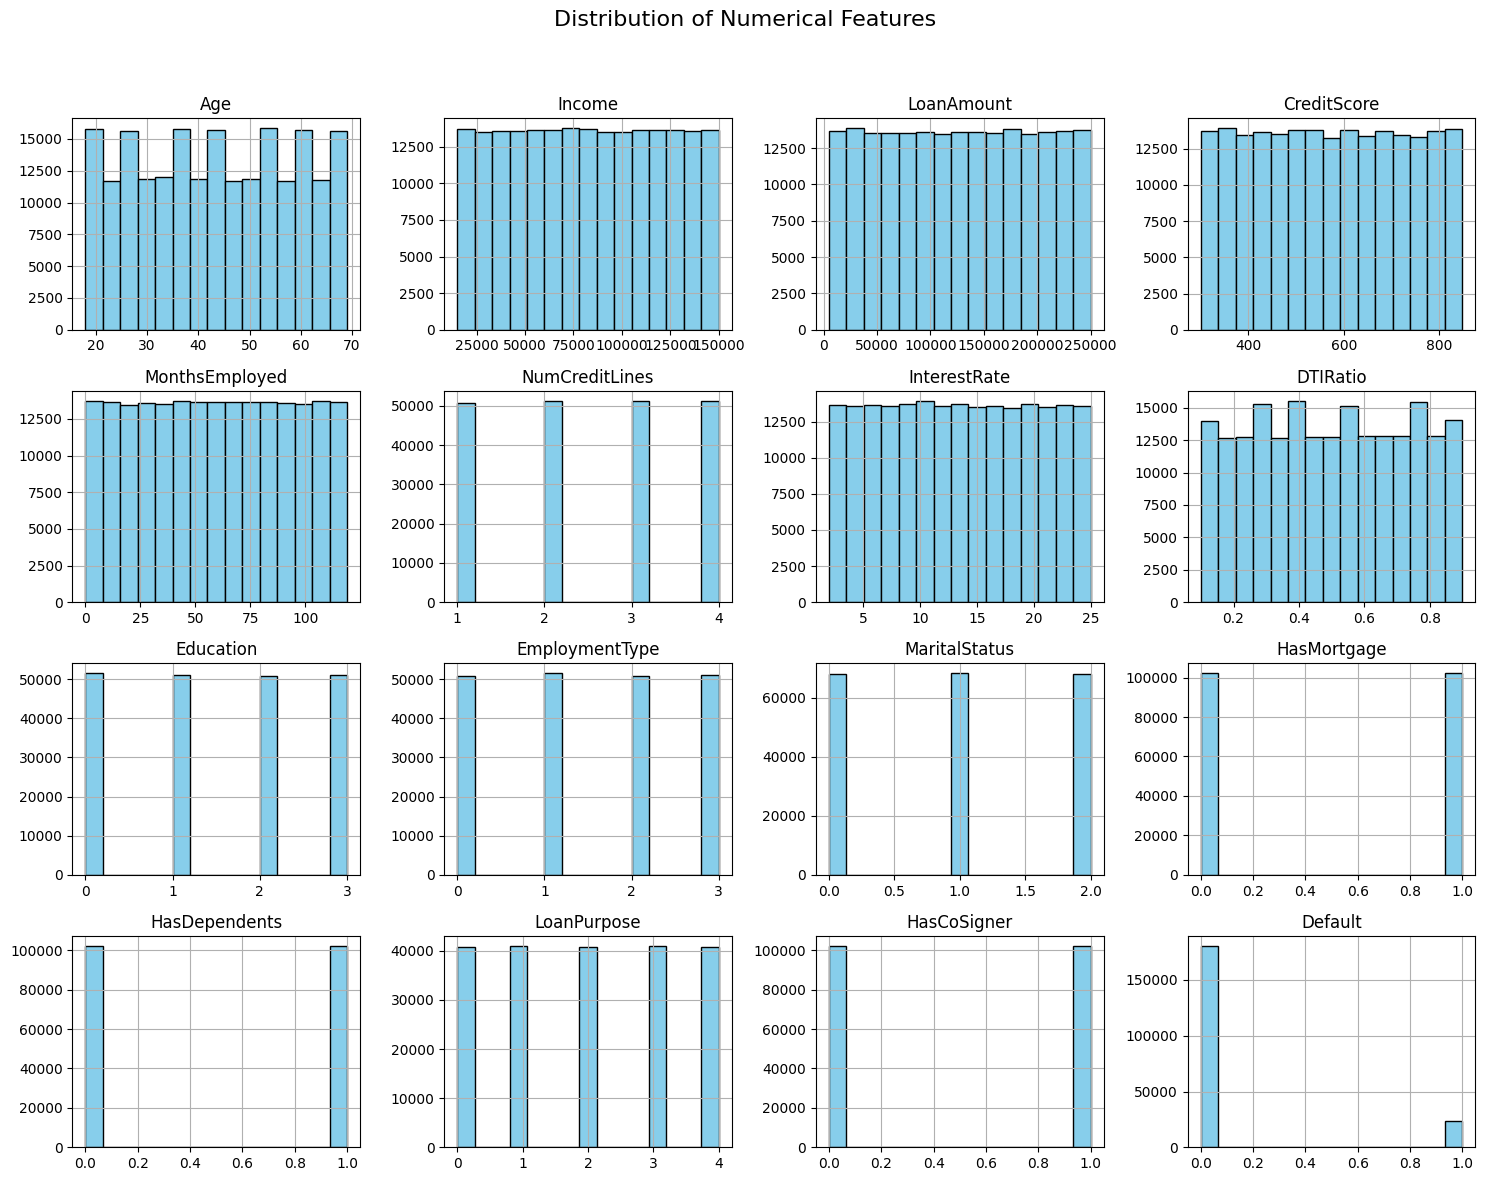

In [25]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_columns].hist(bins=15, figsize=(15, 12), layout=(4, 4), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

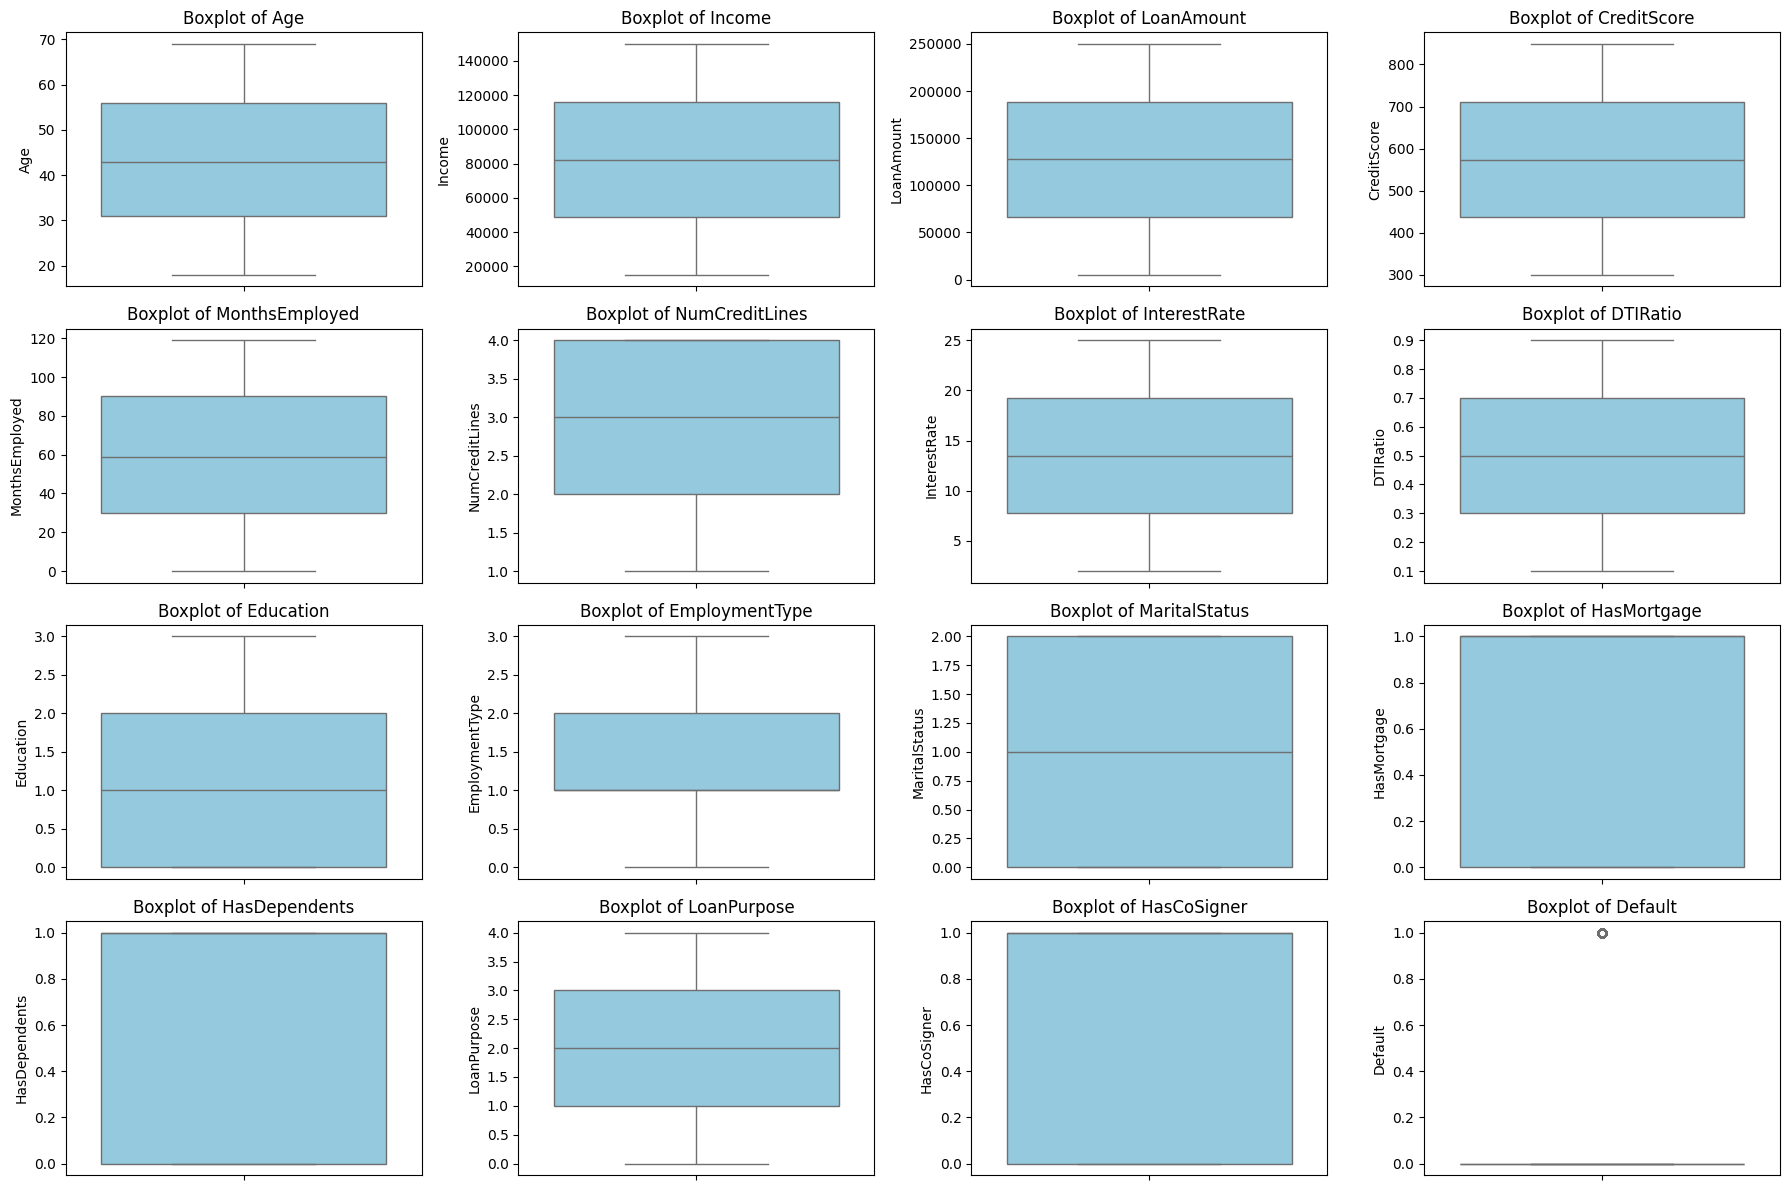

In [26]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Further Data analysis

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]


## One-Hot encoding

In [27]:
oneHotEmployment = pd.get_dummies(df['EmploymentType'], prefix='EmploymentType')
oneHotMarital = pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')
oneHotLoanPurpose = pd.get_dummies(df['LoanPurpose'], prefix='LoanPurpose')
df = pd.concat([df, oneHotEmployment], axis=1)
df = pd.concat([df, oneHotMarital], axis=1)
df = pd.concat([df, oneHotLoanPurpose], axis=1)
df.drop('EmploymentType', axis=1, inplace=True)
df.drop('MaritalStatus', axis=1, inplace=True)
df.drop('LoanPurpose', axis=1, inplace=True)

In [28]:
df

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0        18  137576      209136          846              26               2   
1        47   57194        5970          748              30               2   
2        26   84328       95065          453               7               2   
3        53   49795      229582          533             107               3   
4        49  115450       22072          840               0               4   
...     ...     ...         ...          ...             ...             ...   
204272   40  116623      161673          651              79               2   
204273   67   62958      189499          460              77               3   
204274   62   34372       59645          524              94               3   
204275   44  146262      198454          489               7               4   
204276   36   97844      188593          542               2               3   

        InterestRate  DTIRatio  Education  HasMortgage  ...  EmploymentType_2  \
0              10.47      0.81          1            1  ...              True   
1              19.72      0.73          1            0  ...             False   
2              24.25      0.45          2            0  ...              True   
3              14.44      0.17          0            1  ...              True   
4              24.48      0.11          0            0  ...             False   
...              ...       ...        ...          ...  ...               ...   
204272         23.44      0.87          0            0  ...             False   
204273          9.29      0.11          0            0  ...              True   
204274          9.72      0.24          3            1  ...             False   
204275          4.31      0.30          1            1  ...              True   
204276         23.14      0.83          0            0  ...             False   

        EmploymentType_3  MaritalStatus_0  MaritalStatus_1  MaritalStatus_2  \
0                  False            False            False             True   
1                   True             True            False            False   
2                  False            False             True            False   
3                  False            False            False             True   
4                  False            False            False             True   
...                  ...              ...              ...              ...   
204272             False             True            False            False   
204273             False            False            False             True   
204274             False            False            False             True   
204275             False            False             True            False   
204276             False             True            False            False   

        LoanPurpose_0  LoanPurpose_1  LoanPurpose_2  LoanPurpose_3  \
0               False           True          False          False   
1               False          False           True          False   
2               False          False          False          False   
3                True          False          False          False   
4               False          False           True          False   
...               ...            ...            ...            ...   
204272          False          False          False           True   
204273          False           True          False          False   
204274           True          False          False          False   
204275          False          False          False           True   
204276          False          False          False           True   

        LoanPurpose_4  
0               False  
1               False  
2                True  
3               False  
4               False  
...               ...  
204272          False  
204273          False  
204274          False  
204275          False  
204276          Fals

# Normalizing the Data
 Normalise the dataset such that they are propertionally scaled between the range 0 and 1

In [29]:
min_max_scaler = MinMaxScaler()
normalised = min_max_scaler.fit_transform(df)
df=pd.DataFrame(normalised, columns= df.columns)
df

Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
0       0.000000  0.907977    0.833211     0.994536        0.218487   
1       0.568627  0.312550    0.003955     0.816029        0.252101   
2       0.156863  0.513545    0.367611     0.278689        0.058824   
3       0.686275  0.257743    0.916665     0.424408        0.899160   
4       0.607843  0.744080    0.069678     0.983607        0.000000   
...          ...       ...         ...          ...             ...   
204272  0.431373  0.752769    0.639483     0.639344        0.663866   
204273  0.960784  0.355247    0.753059     0.291439        0.647059   
204274  0.862745  0.143497    0.223039     0.408015        0.789916   
204275  0.509804  0.972318    0.789611     0.344262        0.058824   
204276  0.352941  0.613664    0.749361     0.440801        0.016807   

        NumCreditLines  InterestRate  DTIRatio  Education  HasMortgage  ...  \
0             0.333333      0.368261    0.8875   0.333333          1.0  ...   
1             0.333333      0.770435    0.7875   0.333333          0.0  ...   
2             0.333333      0.967391    0.4375   0.666667          0.0  ...   
3             0.666667      0.540870    0.0875   0.000000          1.0  ...   
4             1.000000      0.977391    0.0125   0.000000          0.0  ...   
...                ...           ...       ...        ...          ...  ...   
204272        0.333333      0.932174    0.9625   0.000000          0.0  ...   
204273        0.666667      0.316957    0.0125   0.000000          0.0  ...   
204274        0.666667      0.335652    0.1750   1.000000          1.0  ...   
204275        1.000000      0.100435    0.2500   0.333333          1.0  ...   
204276        0.666667      0.919130    0.9125   0.000000          0.0  ...   

        EmploymentType_2  EmploymentType_3  MaritalStatus_0  MaritalStatus_1  \
0                    1.0               0.0              0.0              0.0   
1                    0.0               1.0              1.0              0.0   
2                    1.0               0.0              0.0              1.0   
3                    1.0               0.0              0.0              0.0   
4                    0.0               0.0              0.0              0.0   
...                  ...               ...              ...              ...   
204272               0.0               0.0              1.0              0.0   
204273               1.0               0.0              0.0              0.0   
204274               0.0               0.0              0.0              0.0   
204275               1.0               0.0              0.0              1.0   
204276               0.0               0.0              1.0              0.0   

        MaritalStatus_2  LoanPurpose_0  LoanPurpose_1  LoanPurpose_2  \
0                   1.0            0.0            1.0            0.0   
1                   0.0            0.0            0.0            1.0   
2                   0.0            0.0            0.0            0.0   
3                   1.0            1.0            0.0            0.0   
4                   1.0            0.0            0.0            1.0   
...                 ...            ...            ...            ...   
204272              0.0            0.0            0.0            0.0   
204273              1.0            0.0            1.0            0.0   
204274              1.0            1.0            0.0            0.0   
204275              0.0            0.0            0.0            0.0   
204276              0.0            0.0            0.0            0.0   

        LoanPurpose_3  LoanPurpose_4  
0                 0.0            0.0  
1                 0.0            0.0  
2                 0.0            1.0  
3                 0.0            0.0  
4                 0.0            0.0  
...               ...            ...  
204272            1.0            0.0  
204273            0.0            0.0  
204274            0.0            0

In [30]:
df['Default'].value_counts()

Default
0.0    180524
1.0     23753
Name: count, dtype: int64

# Under Sampling and Train Test split
Here we use SMOTE to undersample the data and split the data into training and testing

In [31]:
X = df.drop('Default', axis=1)
y = df['Default']
smote = SMOTE(sampling_strategy='minority', random_state=42)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural Network

In [99]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(32, activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))  
model.add(Dense(8, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',Precision(), Recall()])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               3200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 16)               

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

Train on 163421 samples, validate on 40856 samples
Epoch 1/50
163421/163421 [==============================] - 40s 245us/sample - loss: 0.3373 - acc: 0.8839 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 0.3289 - val_acc: 0.8829 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 2/50
163421/163421 [==============================] - 40s 245us/sample - loss: 0.3249 - acc: 0.8839 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 0.3314 - val_acc: 0.8829 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 3/50
163421/163421 [==============================] - 39s 238us/sample - loss: 0.3224 - acc: 0.8839 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 0.3253 - val_acc: 0.8829 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 4/50
163421/163421 [==============================] - 41s 250us/sample - loss: 0.3209 - acc: 0.8839 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 0.3215 - val_acc: 0.8829 - val_prec

In [ ]:
loss, accuracy,precision,recall = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict and generate a classification report
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

40856/40856 [==============================] - 4s 106us/sample - loss: 0.3170 - acc: 0.8850 - precision_5: 0.6049 - recall_5: 0.0512
Test Accuracy: 0.89
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     36073
         1.0       0.60      0.05      0.09      4783

    accuracy                           0.89     40856
   macro avg       0.75      0.52      0.52     40856
weighted avg       0.85      0.89      0.84     40856



# Logistic Regression

In [29]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1.0, 10.0, 100.0], 
    'max_iter': [100, 300, 500], 
    'solver': ['lbfgs', 'liblinear', 'saga']
}

In [30]:
lr_model = LogisticRegression(random_state=42)

grid_search = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=5,               
    verbose=2,          
    n_jobs=-1         
)

In [31]:
grid_search.fit(X_train, y_train)
lr_model=grid_search.best_estimator_
LRpred = lr_model.predict(X_test)

acc=accuracy_score(y_test, LRpred)
acc

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\Uttam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
525 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Uttam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Uttam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pa

0.8842520070491482

# Support Vector Machine (SVM)

In [37]:
svm_model = SVC(random_state=42)
param_grid_svm = {
    'C': [0.1, 1.0, 10.0, 100.0],                 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'degree': [3, 4, 5],                           
    'gamma': ['scale', 'auto'],                    
    'class_weight': [None, 'balanced']            
}

In [38]:
grid_search_svm = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid_svm,
    scoring='accuracy',  
    cv=5,                 
    verbose=2,           
    n_jobs=-1             
)

In [ ]:
grid_search_svm.fit(X_train, y_train)
svm_model=grid_search.best_estimator_
SVMpred = svm_model.predict(X_test)

acc_svm=accuracy_score(y_test, LRpred)
acc_svm

# Principal Component Analysis

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)
dumPCA = pca.transform(XTest)

# Training the models on the PCA-transformed data

## Neural Network with PCA

In [114]:
model_PCA = Sequential()
model_PCA.add(Dense(128, input_dim=X_train_PCA.shape[1], activation='relu'))  
model_PCA.add(Dropout(0.5))
model_PCA.add(Dense(64, activation='relu')) 
model_PCA.add(Dropout(0.5)) 
model_PCA.add(Dense(32, activation='relu'))  
model_PCA.add(Dropout(0.5))
model_PCA.add(Dense(16, activation='relu'))  
model_PCA.add(Dense(8, activation='relu'))  
model_PCA.add(Dense(1, activation='sigmoid'))
model_PCA.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',Precision(), Recall()])
model_PCA.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 128)               768       
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 16)               

In [115]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model_PCA.fit(
    X_train_PCA, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_PCA, y_test),
    callbacks=[early_stopping],
    verbose=1
)

Train on 163421 samples, validate on 40856 samples
Epoch 1/50
163421/163421 [==============================] - 39s 237us/sample - loss: 0.3656 - acc: 0.8825 - precision_8: 0.1107 - recall_8: 0.0018 - val_loss: 0.3594 - val_acc: 0.8829 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00
Epoch 2/50
163421/163421 [==============================] - 42s 257us/sample - loss: 0.3587 - acc: 0.8839 - precision_8: 0.0000e+00 - recall_8: 0.0000e+00 - val_loss: 0.3610 - val_acc: 0.8829 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00
Epoch 3/50
163421/163421 [==============================] - 43s 261us/sample - loss: 0.3587 - acc: 0.8839 - precision_8: 0.0000e+00 - recall_8: 0.0000e+00 - val_loss: 0.3604 - val_acc: 0.8829 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00
Epoch 4/50
163421/163421 [==============================] - 40s 247us/sample - loss: 0.3586 - acc: 0.8839 - precision_8: 0.0000e+00 - recall_8: 0.0000e+00 - val_loss: 0.3615 - val_acc: 0.8829 - val_precision_8:

In [120]:
loss, accuracy,precision,recall = model_PCA.evaluate(X_test_PCA, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict and generate a classification report
y_pred = (model_PCA.predict(X_test_PCA) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

40856/40856 [==============================] - 4s 108us/sample - loss: 0.3591 - acc: 0.8829 - precision_8: 0.0000e+00 - recall_8: 0.0000e+00
Test Accuracy: 0.88
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     36073
         1.0       0.00      0.00      0.00      4783

    accuracy                           0.88     40856
   macro avg       0.44      0.50      0.47     40856
weighted avg       0.78      0.88      0.83     40856



/home/crappy/ENTER/envs/TFProject/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/crappy/ENTER/envs/TFProject/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/crappy/ENTER/envs/TFProject/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [123]:
predictions=model_PCA.predict(dumPCA)
predicted_labels = (predictions > 0.5).astype(int)

In [124]:
output = pd.DataFrame({
    'LoanID': Loan,'Default': predicted_labels.flatten()
})

output.to_csv('Submission.csv', index=False)

## Logistic Regression with PCA

In [25]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1.0, 10.0, 100.0], 
    'max_iter': [100, 300, 500], 
    'solver': ['lbfgs', 'liblinear', 'saga']
}

In [27]:
lr_model = LogisticRegression(random_state=42)

grid_search = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=5,               
    verbose=2,          
    n_jobs=-1         
)

In [28]:
grid_search.fit(X_train_PCA, y_train)
lr_model=grid_search.best_estimator_
LRpred = lr_model.predict(X_test_PCA)

acc=accuracy_score(y_test, LRpred)
acc

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\Uttam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
525 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Uttam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Uttam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pa

0.8829302917564128

##  Support Vector Machine (SVM) With PCA

In [34]:
svm_model = SVC(random_state=42)
param_grid_svm = {
    'C': [0.1, 1.0, 10.0, 100.0],                 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'degree': [3, 4, 5],                           
    'gamma': ['scale', 'auto'],                    
    'class_weight': [None, 'balanced']            
}

In [35]:
grid_search_svm = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid_svm,
    scoring='accuracy',  
    cv=5,                 
    verbose=2,           
    n_jobs=-1             
)

In [ ]:
grid_search_svm.fit(X_train_PCA, y_train)
svm_model=grid_search.best_estimator_
SVMpred = svm_model.predict(X_test_PCA)

acc_svm=accuracy_score(y_test, LRpred)
acc_svm

# Testing the data
We format the test data so as it is similar to our training dataset.

In [46]:
dfTest = pd.read_csv("test.csv")

In [47]:
Loan = dfTest['LoanID'].copy() 
dfTest.drop(columns="LoanID", inplace=True)
dfTest.drop(columns="LoanTerm", inplace=True)
dfTest

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0       55  112656       92393          581             113               2   
1       56   91569      131575          641              54               1   
2       26   78169       75417          569             105               3   
3       26   63033       10804          326             118               1   
4       24   29665       21182          662             102               3   
...    ...     ...         ...          ...             ...             ...   
51065   51   99473      170353          628              24               1   
51066   29   42016      111314          371              51               4   
51067   67   88507      142666          731              51               1   
51068   42  116649      190938          488               6               1   
51069   49   90420       83956          752              73               2   

       InterestRate  DTIRatio    Education EmploymentType MaritalStatus  \
0             23.54      0.15          PhD  Self-employed        Single   
1             15.19      0.43  High School      Part-time      Divorced   
2             18.02      0.29     Master's      Part-time       Married   
3             14.71      0.41  High School      Part-time        Single   
4             15.02      0.69          PhD     Unemployed        Single   
...             ...       ...          ...            ...           ...   
51065         17.03      0.46          PhD  Self-employed      Divorced   
51066          7.10      0.50          PhD  Self-employed       Married   
51067         22.89      0.79   Bachelor's      Part-time      Divorced   
51068         10.83      0.32   Bachelor's      Full-time       Married   
51069          5.64      0.56     Master's     Unemployed       Married   

      HasMortgage HasDependents LoanPurpose HasCoSigner  
0             Yes           Yes        Home          No  
1             Yes           Yes   Education         Yes  
2             Yes           Yes   Education         Yes  
3              No            No    Business         Yes  
4              No           Yes    Business         Yes  
...           ...           ...         ...         ...  
51065         Yes           Yes        Auto         Yes  
51066          No            No       Other          No  
51067          No            No   Education          No  
51068          No           Yes       Other         Yes  
51069         Yes            No   Education          No  

[51070 rows x 15 columns]

In [48]:
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
label_encoder = LabelEncoder()

for col in categorical_columns:
    dfTest[col] = label_encoder.fit_transform(dfTest[col])
oneHotEmployment = pd.get_dummies(dfTest['EmploymentType'], prefix='EmploymentType')
oneHotMarital = pd.get_dummies(dfTest['MaritalStatus'], prefix='MaritalStatus')
oneHotLoanPurpose = pd.get_dummies(dfTest['LoanPurpose'], prefix='LoanPurpose')
dfTest = pd.concat([dfTest, oneHotEmployment], axis=1)
dfTest = pd.concat([dfTest, oneHotMarital], axis=1)
dfTest = pd.concat([dfTest, oneHotLoanPurpose], axis=1)
dfTest.drop('EmploymentType', axis=1, inplace=True)
dfTest.drop('MaritalStatus', axis=1, inplace=True)
dfTest.drop('LoanPurpose', axis=1, inplace=True)

In [49]:
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform( dfTest)
dfTest=pd.DataFrame(normalized_data, columns= dfTest.columns)
dfTest

Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
0      0.725490  0.723410    0.356727     0.511840        0.949580   
1      0.745098  0.567203    0.516662     0.621129        0.453782   
2      0.156863  0.467939    0.287433     0.489982        0.882353   
3      0.156863  0.355816    0.023691     0.047359        0.991597   
4      0.117647  0.108634    0.066053     0.659381        0.857143   
...         ...       ...         ...          ...             ...   
51065  0.647059  0.625754    0.674949     0.597450        0.201681   
51066  0.215686  0.200127    0.433959     0.129326        0.428571   
51067  0.960784  0.544520    0.561934     0.785064        0.428571   
51068  0.470588  0.752989    0.758974     0.342441        0.050420   
51069  0.607843  0.558691    0.322288     0.823315        0.613445   

       NumCreditLines  InterestRate  DTIRatio  Education  HasMortgage  ...  \
0            0.333333      0.936522    0.0625   1.000000          1.0  ...   
1            0.000000      0.573478    0.4125   0.333333          1.0  ...   
2            0.666667      0.696522    0.2375   0.666667          1.0  ...   
3            0.000000      0.552609    0.3875   0.333333          0.0  ...   
4            0.666667      0.566087    0.7375   1.000000          0.0  ...   
...               ...           ...       ...        ...          ...  ...   
51065        0.000000      0.653478    0.4500   1.000000          1.0  ...   
51066        1.000000      0.221739    0.5000   1.000000          0.0  ...   
51067        0.000000      0.908261    0.8625   0.000000          0.0  ...   
51068        0.000000      0.383913    0.2750   0.000000          0.0  ...   
51069        0.333333      0.158261    0.5750   0.666667          1.0  ...   

       EmploymentType_2  EmploymentType_3  MaritalStatus_0  MaritalStatus_1  \
0                   1.0               0.0              0.0              0.0   
1                   0.0               0.0              1.0              0.0   
2                   0.0               0.0              0.0              1.0   
3                   0.0               0.0              0.0              0.0   
4                   0.0               1.0              0.0              0.0   
...                 ...               ...              ...              ...   
51065               1.0               0.0              1.0              0.0   
51066               1.0               0.0              0.0              1.0   
51067               0.0               0.0              1.0              0.0   
51068               0.0               0.0              0.0              1.0   
51069               0.0               1.0              0.0              1.0   

       MaritalStatus_2  LoanPurpose_0  LoanPurpose_1  LoanPurpose_2  \
0                  1.0            0.0            0.0            0.0   
1                  0.0            0.0            0.0            1.0   
2                  0.0            0.0            0.0            1.0   
3                  1.0            0.0            1.0            0.0   
4                  1.0            0.0            1.0            0.0   
...                ...            ...            ...            ...   
51065              0.0            1.0            0.0            0.0   
51066              0.0            0.0            0.0            0.0   
51067              0.0            0.0            0.0            1.0   
51068              0.0            0.0            0.0            0.0   
51069              0.0            0.0            0.0            1.0   

       LoanPurpose_3  LoanPurpose_4  
0                1.0            0.0  
1                0.0            0.0  
2                0.0            0.0  
3                0.0            0.0  
4                0.0            0.0  
...              ...            ...  
51065            0.0            0.0  
51066            0.0            1.0  
51067            0.0            0.0  
51068            0.0            1.0  
51069         

## We predict the test data using  the  model  and create submission csv file

In [52]:
XTest = dfTest
predictions=lr_model.predict(XTest)
predicted_labels = (predictions > 0.5).astype(int)

In [53]:
output = pd.DataFrame({
    'LoanID': Loan,'Default': predicted_labels.flatten()
})

output.to_csv('Submission.csv', index=False)